In [28]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import utils as ut
from scipy import stats

In [2]:
sns.set_style("dark", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("paper")
sns.set(font_scale = 1.5)

In [3]:
lifestyle_file = "/data5/deepro/ukbiobank/analysis/lifestyle_factors/data/lifestyle_v2.xlsx"
store_dir = "/data5/deepro/ukbiobank/preprocess/rarecomb_pheno_prepare/data"
lifestyle_df = pd.read_excel(lifestyle_file)

# Integer

In [4]:
int_df = ut.get_integer_factors(lifestyle_df, store_dir)

In [5]:
# replace negatives
def replace_negs(df):
    return df.mask(df<0)

## Diet

In [6]:
diet_fields = [1289, 1299, 1309, 1319, 1438, 1458, 1488, 1498, 1528]
diet_df = replace_negs(int_df.loc[:, diet_fields])
sdiet_df = ut.standardize_df(diet_df)

## Mental health

In [7]:
mental_health_fields = [4609, 4620, 5375, 5386, 20127]
mental_health_df = replace_negs(int_df.loc[:, mental_health_fields])
smental_health_df = ut.standardize_df(mental_health_df)

In [9]:
smental_health_df.corr()

,4609,4620,5375,5386,20127
4609,1.000000,0.480146,0.762345,0.550188,0.102069
4620,0.480146,1.000000,0.488979,0.724607,0.098961
5375,0.762345,0.488979,1.000000,0.641771,0.073597
5386,0.550188,0.724607,0.641771,1.000000,0.110398
20127,0.102069,0.098961,0.073597,0.110398,1.000000


In [19]:
mental_health_df.describe()

,4609,4620,5375,5386,20127
count,43600.000000,39592.000000,28061.000000,26214.000000,160849.000000
mean,15.486204,6.144684,15.110385,7.058099,4.113000
std,40.791700,36.233429,42.251599,32.578041,3.266988
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000
50%,5.000000,2.000000,4.000000,2.000000,4.000000
75%,12.000000,4.000000,12.000000,4.000000,6.000000
max,999.000000,3000.000000,999.000000,999.000000,12.000000


In [15]:
smental_health_df.corr()

,4609,4620,5375,5386,20127
4609,1.000000,0.480146,0.762345,0.550188,0.102069
4620,0.480146,1.000000,0.488979,0.724607,0.098961
5375,0.762345,0.488979,1.000000,0.641771,0.073597
5386,0.550188,0.724607,0.641771,1.000000,0.110398
20127,0.102069,0.098961,0.073597,0.110398,1.000000


### Visualization of individuals with their fields as features to check if the field PCs agree with data quantiles 

In [9]:
def create_labels(df, lowq=0.25, highq=0.75):
    qdf = df.quantile([lowq, highq])
    label_df = df.copy()
    label_df = label_df.mask(df<qdf.iloc[0, :], other="low")
    label_df = label_df.mask(df>qdf.iloc[1, :], other="high")
    label_df = label_df.mask((df>=qdf.iloc[0, :])&(df<=qdf.iloc[1, :]), other="medium")
    return label_df

In [37]:
# , 5375, 5386
mental_health_selected_df = smental_health_df.loc[:, [4609, 5375]].dropna(axis=0)


In [36]:
smental_health_df.corr()

,4609,4620,5375,5386,20127
4609,1.000000,0.480146,0.762345,0.550188,0.102069
4620,0.480146,1.000000,0.488979,0.724607,0.098961
5375,0.762345,0.488979,1.000000,0.641771,0.073597
5386,0.550188,0.724607,0.641771,1.000000,0.110398
20127,0.102069,0.098961,0.073597,0.110398,1.000000


In [38]:
mental_health_selected_label_df = create_labels(mental_health_selected_df)

In [39]:
test_df = ut.feature_pca(mental_health_selected_df, mental_health_selected_label_df)


In [54]:
fd = 5375
plt_df = test_df#.loc[(test_df[fd]=="low") | (test_df[fd]=="high")]

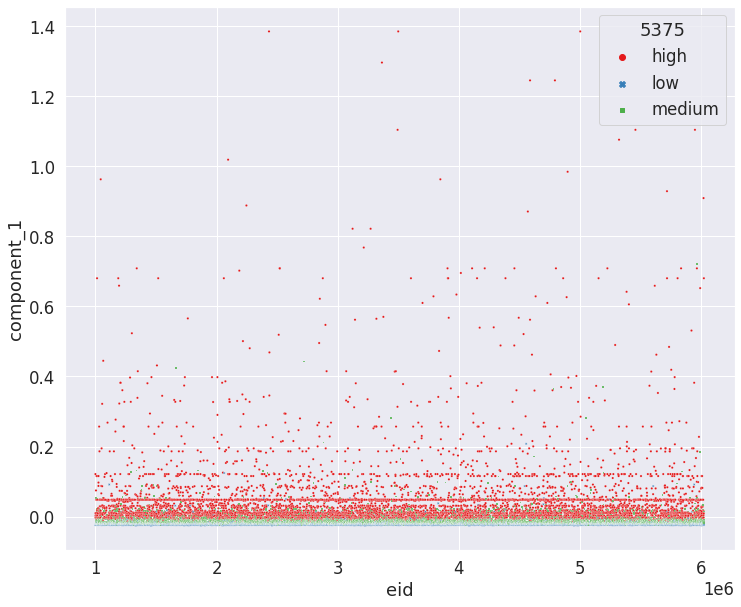

In [55]:
fig, axes = plt.subplots(figsize=(12,10))
sns_ax = sns.scatterplot(
    data=plt_df.reset_index(), 
    x="eid", y="component_1", 
    hue=fd, style=fd, 
    s=5, palette="Set1", 
    ax=axes)

In [15]:
test_df[4620].value_counts()

medium    16682
high       4608
low         269
Name: 4620, dtype: int64

In [56]:
mental_health_selected_df

,4609,5375
eid,,
1000159,0.1050,0.105
1000196,0.0050,0.002
1000235,0.0130,0.013
1000353,0.0040,0.003
1000370,0.0170,0.017
...,...,...
6024770,0.0040,0.002
6024795,0.0140,0.002
6024896,0.0530,0.003


In [24]:
mental_health_selected_label_df

,4609,4620,5375,5386
eid,,,,
1000196,medium,medium,low,medium
1000235,medium,medium,medium,medium
1000353,medium,high,medium,medium
1000488,low,medium,low,medium
1000744,low,medium,medium,medium
...,...,...,...,...
6024319,medium,medium,medium,medium
6024454,medium,medium,medium,medium
6024770,medium,high,low,medium


## Physical Activity

<AxesSubplot:xlabel='component_1', ylabel='component_2'>

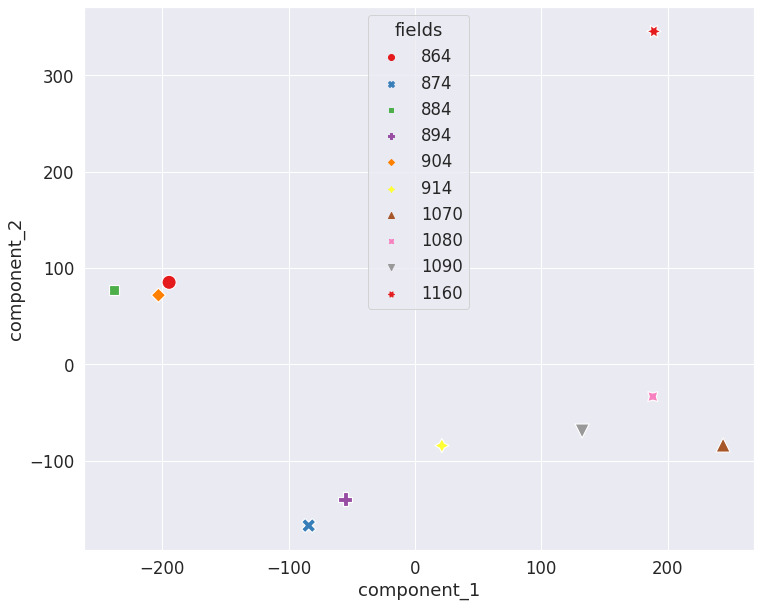

In [9]:
physical_activity_fields = [864, 874, 884, 894, 904, 914,1070, 1080, 1090, 1160]
physical_activity_df = int_df.loc[:, physical_activity_fields]
sphysical_activity_df = ut.standardize_df(physical_activity_df)
ut.visualize_pca(sphysical_activity_df.fillna(sphysical_activity_df.mean()).T)